In [36]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [37]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [38]:
print(data_dir)

/root/.keras/datasets/flower_photos


****Here we have an folder of "roses" make sure you custom dataset should have a class of each classifications****

/root/.keras/datasets/flower_photos/daisy/14087947408_9779257411_n.jpg


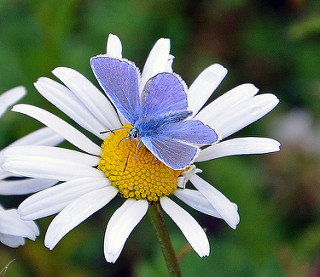

In [39]:
daisy = list(data_dir.glob('daisy/*'))
print(daisy[0])
PIL.Image.open(str(daisy[0]))

In [40]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

# Some Preprocessing

In [41]:
img_height,img_width=180,180

# taking the data form the URL and preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,                # the data
  validation_split=0.2,    # the split
  subset="training",       # what is this subset
  seed=123,
  image_size=(img_height, img_width),  # give your constent size
  batch_size=32                        # batch size(give it according to your processor)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [42]:
# Now making validataion data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = 32
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [43]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


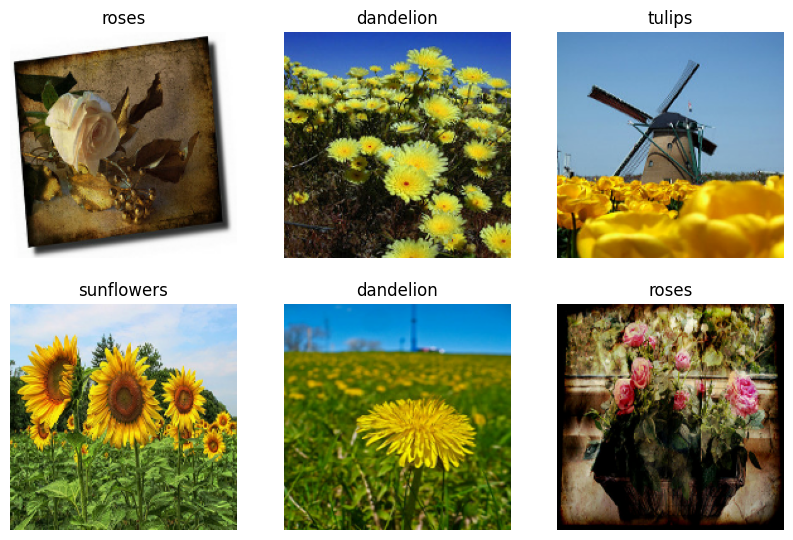

In [44]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training the Model

In [54]:
# Define the input layer for the model
input_layer = Input(shape=(180, 180, 3))

pretrained_model = ResNet50(include_top=False,
                            weights='imagenet',
                            pooling='avg')

# model will not learn new weights
for layer in pretrained_model.layers:
    layer.trainable = False

# Add custom layers on top of it
my_layer = pretrained_model(input_layer)  # Connect the input layer to the pre-trained model
my_layer = Flatten()(my_layer)  # Flatten the output of the pre-trained model
my_layer = Dense(512, activation='relu')(my_layer)  # Add a fully-connected layer with 512 units
output_layer = Dense(5, activation='softmax')(my_layer)  # Add a final softmax layer with 5 classes

# Create the new model with the input and output layers
resnet_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
resnet_model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [55]:
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.6716 - loss: 1.1409 - val_accuracy: 0.8515 - val_loss: 0.4020
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8900 - loss: 0.2762 - val_accuracy: 0.8433 - val_loss: 0.4341
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9280 - loss: 0.1991 - val_accuracy: 0.8706 - val_loss: 0.3641
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.9651 - loss: 0.1062 - val_accuracy: 0.8542 - val_loss: 0.4372
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9844 - loss: 0.0612 - val_accuracy: 0.8815 - val_loss: 0.3889
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9891 - loss: 0.0406 - val_accuracy: 0.8856 - val_loss: 0.3761
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9981 - loss: 0.0173 - val_accuracy: 0.8774 - val_loss: 0.4131
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9999 - loss: 0.0079 - val_accuracy: 0.8910 - v

# Evaluating Model

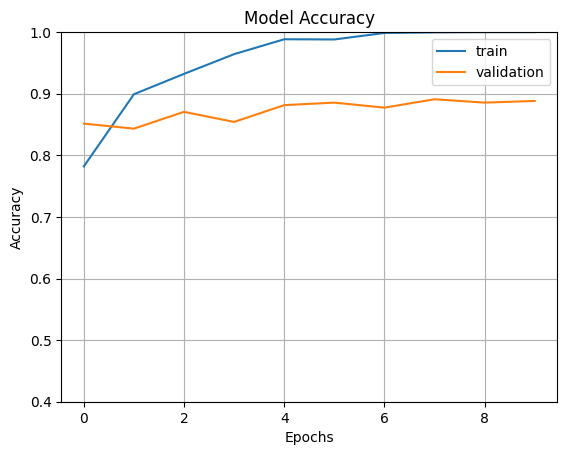

In [56]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

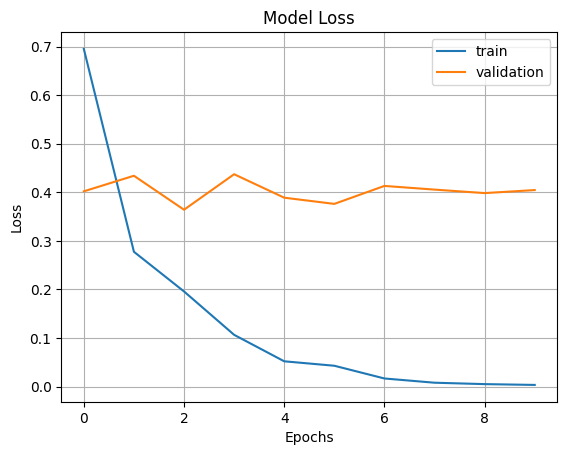

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions


In [58]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0) # increasing the dimention
print(image.shape)

(1, 180, 180, 3)


In [61]:
pred=resnet_model.predict(image)
print(pred)

output_class=class_names[np.argmax(pred)] # findig the maximum value one
print("\nThe predicted class is", output_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[3.4116781e-08 3.8741146e-07 9.7116446e-01 1.0667576e-08 2.8835058e-02]]

The predicted class is roses
